In [27]:
import komm
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use("science")

In [28]:
G_0 = np.array([1, 1, 1])
G_1 = np.array([1, 1, 0])
G_2 = np.array([0, 1, 1])

In [29]:
states = np.array(
    [
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1],
    ],
)

inputs = np.array([0, 1])

for s in states:
    print(f"State: {s}")
    for i in inputs:
        output = np.array([i + s[0], i + s[0] + s[1], i + s[1]]) % 2
        print(f"Input: {i} \t Output: {output}")

State: [0 0]
Input: 0 	 Output: [0 0 0]
Input: 1 	 Output: [1 1 1]
State: [1 0]
Input: 0 	 Output: [1 1 0]
Input: 1 	 Output: [0 0 1]
State: [1 1]
Input: 0 	 Output: [1 0 1]
Input: 1 	 Output: [0 1 0]
State: [0 1]
Input: 0 	 Output: [0 1 1]
Input: 1 	 Output: [1 0 0]


In [30]:
code = komm.ConvolutionalCode(feedforward_polynomials=[[0b011, 0b111, 0b101]])

(n, k, mu) = (code.num_output_bits, code.num_input_bits, int(code.memory_order))

R = k / n

(n, k, mu, R)

(3, 1, 2, 0.3333333333333333)

In [31]:
block_code = komm.TerminatedConvolutionalCode(
    code, num_blocks=5, mode="zero-termination"
)
encoder = komm.BlockEncoder(block_code)

encoder([1, 1, 1, 0, 1])

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [32]:
decoder = komm.BlockDecoder(block_code, method="viterbi_hard")

decoder([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

array([1, 0, 1, 1, 1])

In [33]:
# d_free

# Questão 2

In [39]:
M = 4  # Ordem da modulação
frames = 1000  # Qantidade de quadros
h = 200  # Blocos por quadro
EbN0s = np.arange(-1, 8)  # Relação energia de bit por densidade de potência espectral

modulation = komm.PSKModulation(M, labeling="reflected")

code = komm.ConvolutionalCode(feedforward_polynomials=[[0b1001111, 0b1101101]])
block_code = komm.TerminatedConvolutionalCode(code, h, "zero-termination")
encoder = komm.BlockEncoder(block_code)
decoder = komm.BlockDecoder(block_code, method="viterbi_hard")

u = np.random.randint(0, 2, frames * h)
v = encoder(u)
v_mod = modulation.modulate(v)

ber = np.zeros(len(EbN0s))
for i, EbN0 in enumerate(EbN0s):
    snr = R * np.log2(M) * 10 ** (EbN0 / 10)
    awgn = komm.AWGNChannel(snr=snr, signal_power="measured")

    b = awgn(v_mod)

    v_demod = modulation.demodulate(b)
    u_hat = decoder(v_demod)

    ber[i] = np.mean(u != u_hat)

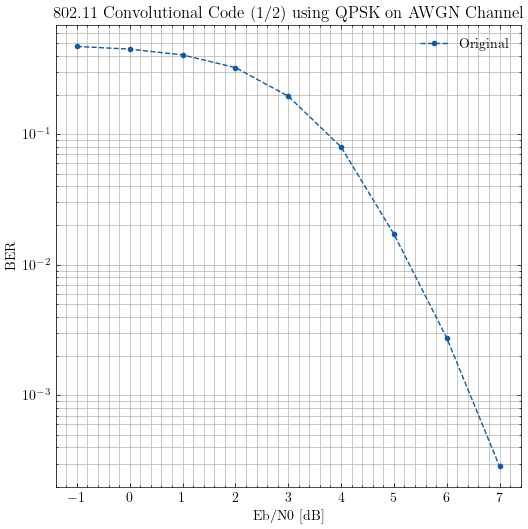

In [47]:
plt.figure(figsize=(6, 6))

plt.semilogy(EbN0s, ber, linestyle="dashed", marker=".", label="Original")

plt.title("802.11 Convolutional Code (1/2) using QPSK on AWGN Channel")
plt.xlabel("Eb/N0 [dB]")
plt.ylabel("BER")

plt.legend()
plt.grid(which="both")

plt.show()